<a href="https://colab.research.google.com/github/Snehalnasare/ML_lab/blob/main/pract6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded   = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
import pandas as pd

dataset = pd.read_csv("breast-cancer.csv") 
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


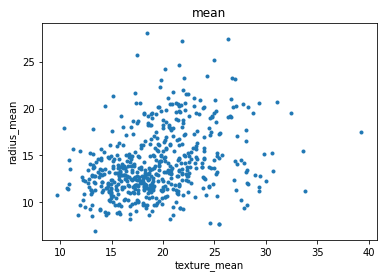

In [ ]:
a1= dataset["texture_mean"]
a2= dataset["radius_mean"]


import matplotlib.pyplot as plt
plt.title("mean") 
plt.xlabel("texture_mean")
plt.ylabel("radius_mean")
plt.plot(a1, a2,'.')
plt.show()


In [ ]:
#standardization of data
import numpy as np
std1  = (a1-np.mean (a1))/np.std(a1) 
std2  = (a2-np. mean (a2))/np.std(a2) 
std3 = np.array([std1.T,std2.T])

In [ ]:
#Covariance
covariance  =  np.cov(np.array([std1,std2]))

In [ ]:
# Eigenvalue and Eigenvector
from numpy import linalg as LA
eigen_val, eigen_vectors = LA.eig(covariance) 
print (eigen_val)
print(eigen_vectors)

[1.32611249 0.67740863]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
#forming new feature set along PCA axes 
new_feature = np.matmul (std3.T,eigen_vectors[1:].T) 
new_feature [:10, :] #printing only 10 rows

array([[-0.69032787],
       [ 1.04382269],
       [ 1.43972249],
       [-0.36428527],
       [ 0.42318941],
       [-0.92751901],
       [ 0.94155305],
       [ 0.1696585 ],
       [ 0.18997337],
       [ 0.44682371]])

In [ ]:
from sklearn.decomposition import PCA
pca=  PCA(n_components = 1) 
decomposed_pcs = pca.fit_transform(std3.T) 
decomposed_pcs[:10, :]

array([[-0.69032787],
       [ 1.04382269],
       [ 1.43972249],
       [-0.36428527],
       [ 0.42318941],
       [-0.92751901],
       [ 0.94155305],
       [ 0.1696585 ],
       [ 0.18997337],
       [ 0.44682371]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
decomposed_pcs = pca.fit_transform(std3.T) 
decomposed_pcs

array([[-0.69032787, -2.24181063],
       [ 1.04382269, -1.54393443],
       [ 1.43972249, -0.79457671],
       ...,
       [ 1.94302906,  0.94984915],
       [ 2.95202813,  0.35222131],
       [-0.41479535,  2.14267022]])